# interpolare cu functii spline liniare

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [18]:
# datele problemei: f, a, b  ## pas 0
a = -math.pi
b = math.pi
f = lambda x: np.cos(2*x) - 2 * np.sin(3*x) 
fderiv = lambda x : -2*np.sin(2*x) - 6*np.cos(3*x) 

# plotare f pe [a, b]  ## pas 1
x_grafic = np.linspace(a, b, 50) # discretizare a intervalului [a, b]
y_grafic = f(x_grafic)

In [19]:
def spline_liniara(X, Y, x):
    """
    X = [X0..Xn]
    Y = f(X)
    x punctul in care aproximez
    """
    # pas 1
    n = X.shape[0] - 1
    A = np.zeros([n])
    B = np.zeros([n])
    
    # pas 2
    for i in range(n):
        A[i] = Y[i]
        B[i] = (Y[i+1] - Y[i]) / (X[i+1] - X[i])
        
    # pas 3
    for i in range(n):
        if X[i] <= x <= X[i+1]: # se afla in interval
            return A[i] + B[i] * (x - X[i])
    return -1

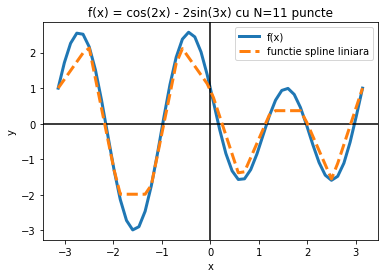

In [20]:
plt.figure(0)
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f(x)') # desenez graficul functiei f
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY


# noduri de interpolare  ## pas 2
N = 10
plt.title('f(x) = cos(2x) - 2sin(3x) cu N=' + str(N+1) + ' puncte') # Titlul figurii
X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
Y = f(X)

spline_lin = np.zeros(len(x_grafic))
for i in range(len(x_grafic)):
    spline_lin[i] = spline_liniara(X, Y, x_grafic[i])

plt.plot(x_grafic, spline_lin, linestyle = '--', linewidth = 3, label = 'functie spline liniara') # desenez functia spline liniara S
plt.legend() # Adauga legenda
plt.show() # Arata graficul

In [21]:
def spline_patratica(X, Y, x):
    """
    X = [X0..Xn]
    Y = f(X)
    x punctul in care aproximez
    """
    # pas 1
    n = X.shape[0] - 1
    A = np.zeros([n+1])
    B = np.zeros([n+1])
    C = np.zeros([n])
    
    # pas 2
    for i in range(n+1):
        A[i] = Y[i]
    
    B[n] = fderiv(X[n])
    for i in range(n-1, -1, -1):  
        h = X[i+1] - X[i]
        B[i] = 2 / h * (A[i+1] - A[i]) - B[i+1]
        
    for i in range(n):
        h = X[i+1] - X[i]
        C[i] = 1/(h**2) * (A[i+1] - A[i]) - B[i] / h
        
    # pas 3
    for i in range(n):
        if X[i] <= x <= X[i+1]: # se afla in interval
            return A[i] + B[i] * (x - X[i]) + C[i] * (x - X[i])**2
    return -1

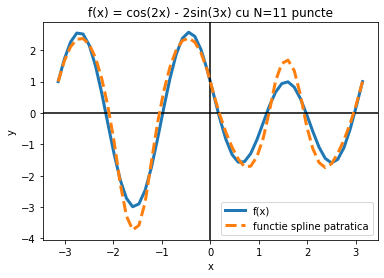

In [22]:
plt.figure(0)
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f(x)') # desenez graficul functiei f
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY


# noduri de interpolare  ## pas 2
N = 10
plt.title('f(x) = cos(2x) - 2sin(3x) cu N=' + str(N+1) + ' puncte') # Titlul figurii
X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
Y = f(X)

spline_patr = np.zeros(len(x_grafic))
for i in range(len(x_grafic)):
    spline_patr[i] = spline_patratica(X, Y, x_grafic[i])

plt.plot(x_grafic, spline_patr, linestyle = '--', linewidth = 3, label = 'functie spline patratica') # desenez functia spline liniara S
plt.legend() # Adauga legenda
plt.show() # Arata graficul

In [23]:
def spline_cubica(X, Y, x):
    """
    X = [X0..Xn]
    Y = f(X)
    x punctul in care aproximez
    """
    # pas 1
    n = X.shape[0] - 1
    A = np.zeros([n+1])
    B = np.zeros([n+1])
    C = np.zeros([n])
    D = np.zeros([n])
    
    # pas 2
    for i in range(n+1):
        A[i] = Y[i]
    
    #construire matrice A 
    matriceA = np.zeros((n+1, n+1))
    matriceA[0][0] = 1
    for i in range(1, n):
        matriceA[i][i-1] = 1
        matriceA[i][i] = 4
        matriceA[i][i+1] = 1
    matriceA[n][n] = 1
    
    #construire matrice W
    W = np.zeros((n+1, 1)) #n+1 linii, 1 coloana
    W[0][0] = fderiv(X[0])
    for i in range(1, n):
        h = X[i+1] - X[i]
        W[i] = 3/h *(Y[i+1] - Y[i-1])
    W[n] = fderiv(X[n])
    
    #calcul coeficienti B
    B = np.linalg.solve(matriceA, W) # rezolv sistemul: matriceA * B = W
    
    #calcul coeficienti C si D
    for i in range(n):
        h = X[i+1] - X[i]
        hh = h * h #h^2
        hhh = h * h * h #h^3
        C[i] = 3/hh * (Y[i+1] - Y[i]) - 1/h * (B[i+1] + 2*B[i])
        D[i] = -2/hhh * (Y[i+1] - Y[i]) + 1/hh * (B[i+1] + B[i])
        
    # pas 3
    for i in range(n):
        if X[i] <= x <= X[i+1]: # se afla in interval
            return A[i] + B[i] * (x - X[i]) + C[i] * (x - X[i])**2 + D[i] * (x - X[i])**3
    return -1

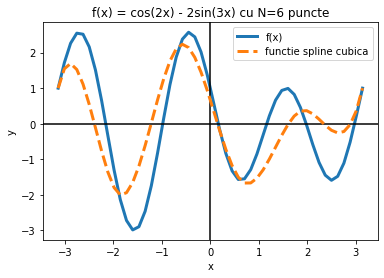

In [24]:
plt.figure(0)
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f(x)') # desenez graficul functiei f
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY


# noduri de interpolare  ## pas 2
N = 5
plt.title('f(x) = cos(2x) - 2sin(3x) cu N=' + str(N+1) + ' puncte') # Titlul figurii
X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
Y = f(X)

spline_cub = np.zeros(len(x_grafic))
for i in range(len(x_grafic)):
    spline_cub[i] = spline_cubica(X, Y, x_grafic[i])
plt.plot(x_grafic, spline_cub, linestyle = '--', linewidth = 3, label = 'functie spline cubica') # desenez functia spline liniara S
plt.legend() # Adauga legenda
plt.show() # Arata graficul